In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import numpy as np

from matplotlib import pyplot

from scipy import optimize

%matplotlib inline

In [61]:
import numpy as np
from sklearn.model_selection import train_test_split

# Cargar el dataset
data = np.loadtxt('/content/drive/MyDrive/primelParcial/preparado_1.txt', delimiter=';')

# Dividir los datos en características (X) y etiquetas (y)
X = data[:, :-1]  # Todas las columnas excepto la última (características)
y = data[:, -1]   # La última columna (etiquetas)

# Declarando variables para la división de datos (80% para entrenamiento, 20% para pruebas)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imprimir el tamaño de los datos de entrenamiento
print("Tamaño de datos de entrenamiento para X:", X_train.shape)
print("Tamaño de datos de entrenamiento para y:", y_train.shape)

# Imprimir el tamaño de los datos de prueba
print("Tamaño de datos de prueba para X:", X_test.shape)
print("Tamaño de datos de prueba para y:", y_test.shape)
print(y)
print(data.shape)

Tamaño de datos de entrenamiento para X: (46876, 55)
Tamaño de datos de entrenamiento para y: (46876,)
Tamaño de datos de prueba para X: (11720, 55)
Tamaño de datos de prueba para y: (11720,)
[0. 0. 0. ... 1. 1. 1.]
(58596, 56)


In [70]:
def normalizarCaracteristicas(X_train, X_test):
    mu_train = np.mean(X_train, axis=0)
    sigma_train = np.std(X_train, axis=0)

    # Encuentra las columnas donde sigma_train es cero
    zero_std_columns = np.where(sigma_train == 0)[0]

    # Remueve esas columnas de la normalización
    valid_columns = np.where(sigma_train != 0)[0]
    X_train_norm = (X_train[:, valid_columns] - mu_train[valid_columns]) / sigma_train[valid_columns]
    X_test_norm = (X_test[:, valid_columns] - mu_train[valid_columns]) / sigma_train[valid_columns]

    return X_train_norm, mu_train, sigma_train, X_test_norm



In [73]:
# Normalizar las características
X_train_norm, mu_train, sigma_train, X_test_norm = normalizarCaracteristicas(X_train, X_test)

# Obtener las dimensiones de los datos de entrenamiento normalizados
m_train, n_train = X_train_norm.shape

# Agregar una columna de unos a los datos de entrenamiento normalizados
X_train_norm = np.concatenate([np.ones((m_train, 1)), X_train_norm], axis=1)

# Obtener las dimensiones de los datos de prueba normalizados
m_test, n_test = X_test_norm.shape

# Agregar una columna de unos a los datos de prueba normalizados
X_test_norm = np.concatenate([np.ones((m_test, 1)), X_test_norm], axis=1)


In [78]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [81]:
def calcularCosto(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta))

    # Agregar un pequeño valor epsilon para evitar tomar el logaritmo de cero
    epsilon = 1e-10
    J = (1 / m) * np.sum(-y.dot(np.log(h + epsilon)) - (1 - y).dot(np.log(1 - h + epsilon)))
    return J

theta = np.zeros(X_train_norm.shape[1])



costo_entrenamiento = calcularCosto(theta, X_train_norm, y_train)


costo_prueba = calcularCosto(theta, X_test_norm, y_test)


print("Costo en el conjunto de entrenamiento:", costo_entrenamiento)
print("Costo en el conjunto de prueba:", costo_prueba)

Costo en el conjunto de entrenamiento: 0.6931471803599575
Costo en el conjunto de prueba: 0.6931471803599439


In [82]:
def descensoGradiente(theta, X, y, alpha, num_iters):

    m = y.shape[0]

    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

Costo final después de la optimización: 0.020613896959383614
theta calculado por el descenso por el gradiente: [-0.15900155  0.33739036  0.6143186   0.40717648 -0.21594741 -0.34661823
 -0.15055679 -0.07689287 -0.23611797  0.09653783 -0.47467527  0.23340207
 -0.30798085 -0.50839163  0.40150959 -0.23047144 -0.34802815 -0.42267154
 -0.52199836 -0.37294173 -0.21718755 -0.37283614 -0.05993657  0.02223544
 -0.05992128  0.19465437  0.15884976  0.1905784  -0.25381476 -0.05825984
  0.03170505 -0.03829773 -0.05594348 -0.03766789 -0.05834401  0.04468548
 -0.03114972  0.0086157  -0.04436667 -0.02866578 -0.07810476 -0.05577037
 -0.07779591  0.61969974 -0.58374105 -0.24422505 -0.0042316  -0.75594354
 -0.63219986 -0.24323068 -0.27527135  0.01915242 -0.05471706]


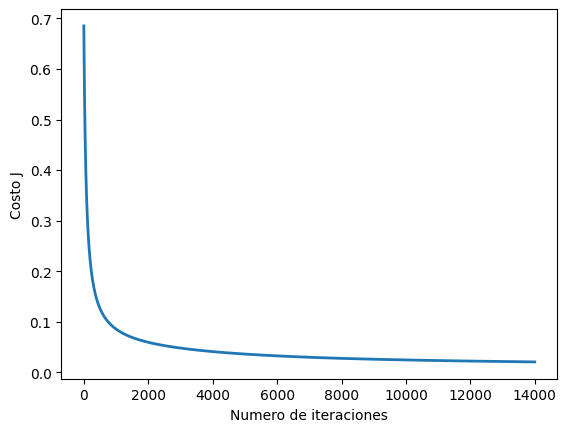

In [86]:

alpha = 0.003
num_iters = 14000


theta = np.zeros(X_train_norm.shape[1])
theta, J_history = descensoGradiente(theta, X_train_norm, y_train, alpha, num_iters)


pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

print('Costo final después de la optimización:', J_history[-1])
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

In [87]:
def predecir(theta, X):

    probabilidades = sigmoid(X.dot(theta))

    clases_predichas = (probabilidades >= 0.5).astype(int)
    return clases_predichas

def evaluar_predicciones(theta, X, y):

    clases_predichas = predecir(theta, X)

    precision = np.mean(clases_predichas == y) * 100

    correctas = np.sum(clases_predichas == y)
    incorrectas = np.sum(clases_predichas != y)
    return precision, correctas, incorrectas


precision, correctas, incorrectas = evaluar_predicciones(theta, X_test_norm, y_test)

incorrectas_porcentaje = 100 - precision


print("Precisión de las predicciones:", precision, "%")
print("Porcentaje de predicciones incorrectas:", incorrectas_porcentaje, "%")
print("Número de predicciones correctas:", correctas)
print("Número de predicciones incorrectas:", incorrectas)

Precisión de las predicciones: 99.65017064846417 %
Porcentaje de predicciones incorrectas: 0.3498293515358313 %
Número de predicciones correctas: 11679
Número de predicciones incorrectas: 41
